# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Nurul Fatwa Al Fajar
- **Email:** arulkece50@gmail.com
- **ID Dicoding:** MC009D5Y0699

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah Pengaruh Musim Mempengaruhi Penyewaan sepeda?

- Pertanyaan 2 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

- Pertanyaan 3 : pada jam keberapa penyewaan sepeda paling banyak dilakukan?

## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [38]:
day_df = pd.read_csv("https://raw.githubusercontent.com/FatwaAlFajar/submission-main/refs/heads/main/data/day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [39]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/FatwaAlFajar/submission-main/refs/heads/main/data/hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Perbandingan antar musim --> Kita bisa mengevaluasi bagaimana jumlah penyewa (baik casual maupun terdaftar) bervariasi di setiap musim.
- day.csv berisi 731 entry data harian
- hour.csv berisi 17379 entry data per jam
- Dampak cuaca –-> Kita bisa menganalisis apakah kondisi cuaca (seperti hujan atau kabut) berpengaruh terhadap jumlah pengguna.
- Hubungan suhu dan angin –-> Kita bisa melihat apakah ada keterkaitan antara suhu, kelembaban, dan kecepatan angin dengan jumlah penyewa.
- Perbedaan pengguna casual dan terdaftar –-> Kita bisa mengecek apakah pengguna casual lebih sering menyewa pada waktu tertentu atau dipengaruhi oleh faktor tertentu (seperti cuaca atau hari kerja).

### Assessing Data

#### **Menilai tabel day_df**

In [40]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [41]:
print("\nPreview Dataset day_df: ")
print(day_df.head())


Preview Dataset day_df: 
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [42]:
print("\nCek Data Yang Hilang dalam Dataset day_df: ")
print(day_df.isna().sum())


Cek Data Yang Hilang dalam Dataset day_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### **Menilai tabel hour_df**

In [43]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [44]:
print("\nPreview Dataset hour_df: ")
print(hour_df.head())


Preview Dataset hour_df: 
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [45]:
print("\nCek Data Hilang dalam Dataset hour_df: ")
print(hour_df.isna().sum())


Cek Data Hilang dalam Dataset hour_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ditemukan data yang hilang dalam kedua dataset yang ada (day.csv dan hour.csv).
Kolom dteday masih dalam format object (string), sebaiknya diubah menjadi format dengan nama datetime.
- Semua kolom lainnya memiliki tipe data yang sesuai dan pas dengan nilai yang disimpannya (integer dan float).

### Cleaning Data

#### Membersihkan day_df

##### Mengecek Duplicate data

In [46]:
print("\nJumlah Data Duplikat Yang Ada Dalam Dataset day_df: ", day_df.duplicated().sum())


Jumlah Data Duplikat Yang Ada Dalam Dataset day_df:  0


##### Missing Value

In [47]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Membersihkan hour_df

##### Duplicate data

In [48]:
print("\nJumlah Data Duplikat Yang Ada Dalam Dataset hour_df: ", hour_df.duplicated().sum())


Jumlah Data Duplikat Yang Ada Dalam Dataset hour_df:  0


##### Missing value

In [49]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Kedua data set telah bersih dan tidak ada yang perlu di cleaning lagi.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [50]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
98,99,2011-04-09,2,0,4,0,6,0,2,0.342500,0.341529,0.877500,0.133083,879,1576,2455
327,328,2011-11-24,4,0,11,1,4,0,1,0.373333,0.372471,0.549167,0.167304,560,935,1495
600,601,2012-08-23,3,1,8,0,4,1,1,0.695833,0.637008,0.635833,0.084596,1363,6402,7765
668,669,2012-10-30,4,1,10,0,2,1,2,0.318182,0.309909,0.825455,0.213009,87,1009,1096
113,114,2011-04-24,2,0,4,0,0,0,2,0.581667,0.551763,0.810833,0.192175,1710,2481,4191
126,127,2011-05-07,2,0,5,0,6,0,1,0.520000,0.512621,0.541250,0.160450,1612,3102,4714
35,36,2011-02-05,1,0,2,0,6,0,2,0.233333,0.243058,0.929167,0.161079,100,905,1005
278,279,2011-10-06,4,0,10,0,4,1,1,0.494167,0.480425,0.620833,0.134954,639,4126,4765
698,699,2012-11-29,4,1,11,0,4,1,1,0.280870,0.298422,0.555652,0.115522,243,5080,5323
90,91,2011-04-01,2,0,4,0,5,1,2,0.300000,0.283454,0.686250,0.258708,307,1920,2227


### Explore hour-df

In [51]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4643,4644,2011-07-17,3,0,7,9,0,0,0,1,0.72,0.6667,0.58,0.2239,74,110,184
8697,8698,2012-01-03,1,1,1,5,0,2,1,1,0.14,0.1364,0.54,0.1940,0,12,12
999,1000,2011-02-14,1,0,2,7,0,1,1,1,0.34,0.3030,0.46,0.2985,2,96,98
11486,11487,2012-04-28,2,1,4,19,0,6,0,3,0.36,0.3485,0.71,0.1343,29,110,139
8534,8535,2011-12-27,1,0,12,8,0,2,1,2,0.30,0.3030,0.65,0.1642,9,155,164
7181,7182,2011-10-31,4,0,10,20,0,1,1,1,0.40,0.4091,0.66,0.0896,18,154,172
12009,12010,2012-05-20,2,1,5,14,0,0,0,1,0.72,0.6515,0.39,0.3881,236,307,543
15854,15855,2012-10-27,4,1,10,19,0,6,0,2,0.52,0.5000,0.72,0.2239,67,233,300
10778,10779,2012-03-30,2,1,3,5,0,5,1,1,0.32,0.3333,0.61,0.0896,0,26,26
5584,5585,2011-08-25,3,0,8,14,0,4,1,2,0.72,0.6970,0.74,0.0000,27,86,113


## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\Fajar\AppData\Local\Temp\ipykernel_28588\2459745027.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=df, estimator=np.mean, palette='coolwarm')


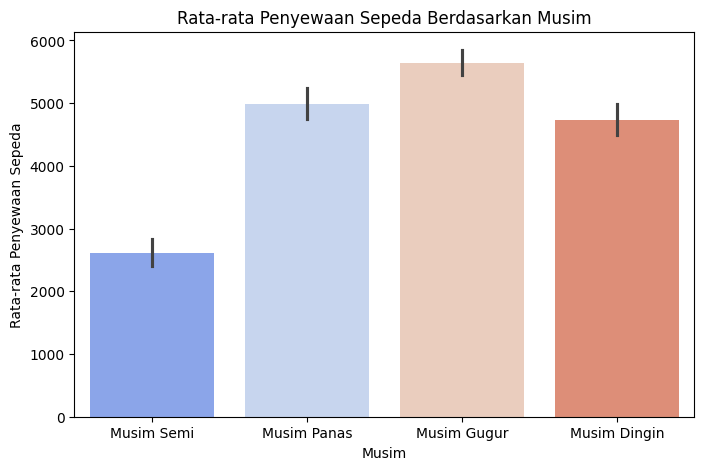

In [52]:
def plot_penyewaan_berdasarkan_musim(df):
    plt.figure(figsize=(8, 5))
    sns.barplot(x='season', y='cnt', data=df, estimator=np.mean, palette='coolwarm')
    plt.xlabel('Musim')
    plt.ylabel('Rata-rata Penyewaan Sepeda')
    plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
    plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
    plt.show()

plot_penyewaan_berdasarkan_musim(day_df)


### Pertanyaan 2:

C:\Users\Fajar\AppData\Local\Temp\ipykernel_28588\1237285017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=df, estimator=np.mean, palette='coolwarm')


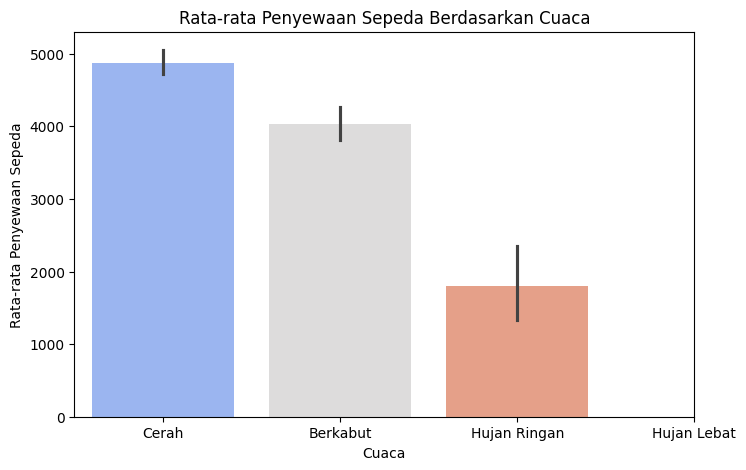

In [53]:
def tampilkan_penyewaan_berdasarkan_cuaca(df):
    plt.figure(figsize=(8,5))
    sns.barplot(x='weathersit', y='cnt', data=df, estimator=np.mean, palette='coolwarm')
    plt.xlabel('Cuaca')
    plt.ylabel('Rata-rata Penyewaan Sepeda')
    plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca')
    plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Lebat'])
    plt.show()

# Panggil fungsi untuk menampilkan penyewaan berdasarkan cuaca
tampilkan_penyewaan_berdasarkan_cuaca(day_df)


### Pertanyaan 3:

C:\Users\Fajar\AppData\Local\Temp\ipykernel_28588\679762051.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=df, estimator=np.mean, palette='viridis', order=sorted(df['hr'].unique()))


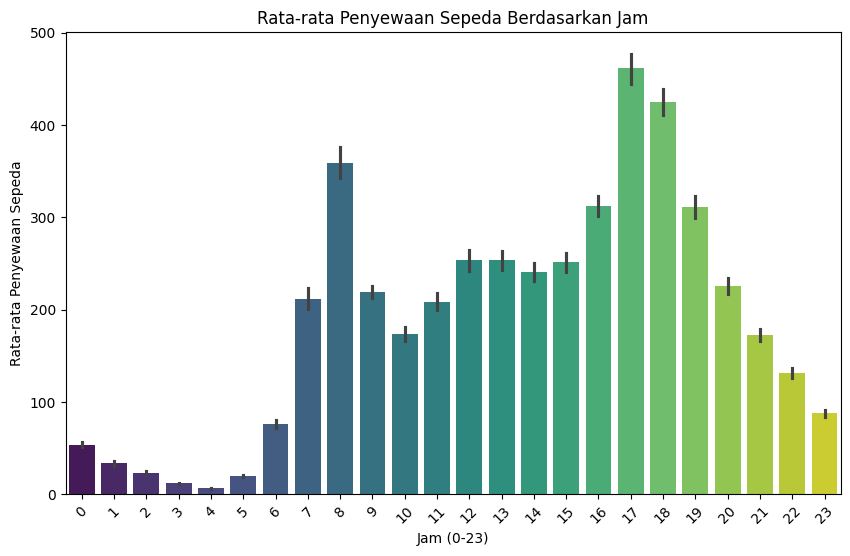

Penyewaan sepeda paling banyak dilakukan pada jam ke-18 dengan total 977 penyewaan.
Penyewaan sepeda paling sedikit dilakukan pada jam ke-4 dengan total 1 penyewaan.


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def tampilkan_penyewaan_berdasarkan_jam(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='hr', y='cnt', data=df, estimator=np.mean, palette='viridis', order=sorted(df['hr'].unique()))
    plt.xlabel('Jam (0-23)')
    plt.ylabel('Rata-rata Penyewaan Sepeda')
    plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
    plt.xticks(rotation=45)
    plt.show()

# Panggil fungsi untuk menampilkan grafik
tampilkan_penyewaan_berdasarkan_jam(hour_df)

# Cari jam dengan penyewaan sepeda tertinggi
jam_terbanyak = hour_df.loc[hour_df['cnt'].idxmax(), 'hr']
jumlah_terbanyak = hour_df['cnt'].max()
print(f"Penyewaan sepeda paling banyak dilakukan pada jam ke-{jam_terbanyak} dengan total {jumlah_terbanyak} penyewaan.")

# Cari jam dengan penyewaan sepeda tersedikit
jam_tersedikit = hour_df.loc[hour_df['cnt'].idxmin(), 'hr']
jumlah_tersedikit = hour_df['cnt'].min()
print(f"Penyewaan sepeda paling sedikit dilakukan pada jam ke-{jam_tersedikit} dengan total {jumlah_tersedikit} penyewaan.")


## Conclusion

- Penyewaan sepeda cenderung lebih tinggi pada musim gugur dan pada saat cuaca sedang cerah
- Kondisi cuaca yang lebih cerah meningkatkan jumlah penyewaan sepeda, sedangkan hujan lebat menguranginya secara signifikan.
- penyewaan tertinggi 997 penyewaan pada jam ke 18
- penyewaan terendah 1 penyewaan pada jam ke 4